## Dragon Real Estate- Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288338,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704867,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# for plotting histogram
# import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))                  #to print histogram

## Train-Test Splitting

In [9]:
#for learing purpose...
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return(data.iloc[train_indices],data.iloc[test_indices])

In [10]:
#train_set, test_set = split_train_test(housing,0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
# strat_train_set["CHAS"].value_counts()        #to check the train set division

In [15]:
# strat_test_set["CHAS"].value_counts()       # to check the test set divison

In [16]:
# 95/7                                      # verify the splitting of test data

In [17]:
# 376/28                      # verify the splitting of train data

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679854
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
# scatter_matrix(housing[attributes],figsize=(12,8))     # for plotting, uncomment this line

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

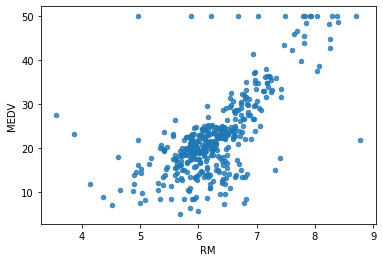

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out Attributes Combinations

In [22]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679854
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527941
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

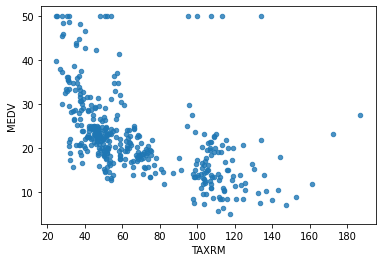

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
# to take care of missing attribute, we have three optinos:
# 1. Get rid of the missing datapoints.
# 2. Get rid of the whole attribute.
# 3. Set the value to some values( 0, mean or median )

In [28]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape  #and also note that the original dataframe will remain unchanged

(400, 13)

In [29]:
housing.drop("RM",axis=1) #option 2
# now there is no "RM" column and also note that the original dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [30]:
median = housing["RM"].median()    # compute median for option 3

In [31]:
housing["RM"].fillna(median)       # original dataframe is unchanged untill we declare implace=True

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 13)

In [33]:
# housing.describe() # before we started filling missing attribute

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [36]:
x = imputer.transform(housing)

In [37]:
housing_tr=pd.DataFrame(x,columns=housing.columns)       #  tr- transformed dataset

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281879,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711147,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

primarily, three types of objects..
1. Estimators: It estimates some parameters based on a dataset. Eg. Imputer
                it has a fit method and transform method.
                fit method: fits the dataset and calculates internal parameters
                
2. Transformers: transform method takes input and return output based on the learnings from fit()
                it also has a conveinence function called fit_transform(), which fits then transform.
3. Predictors: LinearRegression model is an example of predictor. fit() and predict() are two common functions.. 
                it also give some score function which will evaluate the predictions,

## Creating a Pipeline

## Feature Scaling

Primarily, two types of feature scaling method:
1. min-max scaling (normalization)
    (value - min)/(max - min)
    sklearn provides class called min-max scaler
2. Standardization
    (value - mean)/std      
    sklearn provides a class called standardScaler for this.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='median')),
#     add as many as you want
    ('std_scaler',StandardScaler()),
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [42]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.306, 25.109, 16.618, 23.423, 23.66 ])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [50]:
rmse

1.2086113840779305

## Using Better evaluation technique- Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.95536787, 2.85844144, 4.26798135, 2.61010301, 3.29354462,
       2.62914771, 4.76814115, 3.36985379, 3.18202051, 3.08415228])

In [53]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard:",scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [2.95536787 2.85844144 4.26798135 2.61010301 3.29354462 2.62914771
 4.76814115 3.36985379 3.18202051 3.08415228]
Mean: 3.301875372457876
Standard: 0.6631415925489447


Convert this notebook into python file and run the pipeline using visual studio code

## Saving the model

In [56]:
from joblib import dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [60]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse= mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(y_test))

[24.841 11.188 25.541 21.988 19.111 14.827 19.604 14.271 32.288 41.911
 19.272 11.359 24.917 27.185 19.414 11.219 31.467 14.4   23.84  18.578
 20.079 17.708 18.353 22.545 18.363 30.91  15.888 32.637  8.727 33.609
 24.116 21.371 22.77  10.427 21.153 11.266 44.535 24.865 23.347 41.627
 23.775 30.824 19.95  21.166 20.235 33.49  45.039 19.996 20.246 22.018
 21.772 14.51  21.158 14.951 25.006 32.618 42.332 29.122 19.448 20.636
 46.291 10.067 19.06  25.367 15.017 33.064 19.556 18.179 19.314 33.703
 25.448 22.809 21.252 22.227 34.83  13.347 15.835 20.417 20.793 21.579
 22.528 21.411 14.162 22.767 20.829 21.217 14.321 22.19  22.207 23.115
 18.533 26.681  7.555 26.538 19.328 29.504 20.051 31.243 14.41  27.108
 21.782 19.33 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [58]:
final_rmse

3.0281592059319773

In [63]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24480782, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [64]:
from joblib import dump,load
import numpy as np
model=load('Dragon.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -1.24480782, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([21.719])